In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
files_to_load = "Resources/Alcohol_hospital.csv"

hospital_data_df=pd.read_csv(files_to_load)
hospital_data_df

,Indicator,Time Period,Geography,Overall Cases,Overall Population
0,Alcohol-Attributable Hospitalization,2004-05,Ontario,38437,24011810
1,Alcohol-Attributable Hospitalization,2006-07,Ontario,39172,24011810
2,Alcohol-Attributable Hospitalization,2008-09,Ontario,41925,24781475
3,Alcohol-Attributable Hospitalization,2010-11,Ontario,45233,25551140
4,Alcohol-Attributable Hospitalization,2012-13,Ontario,49715,25551140
...,...,...,...,...,...
345,Alcohol-Attributable Hospitalization,2008-09,Toronto Public Health,7360,5086705
346,Alcohol-Attributable Hospitalization,2010-11,Toronto Public Health,8285,5214930
347,Alcohol-Attributable Hospitalization,2012-13,Toronto Public Health,9530,5214930
348,Alcohol-Attributable Hospitalization,2014-15,Toronto Public Health,9702,5459460


In [3]:
grouped_hospital_data = hospital_data_df.groupby('Geography')
print(grouped_hospital_data)
grouped_hospital_data.count()

,Indicator,Time Period,Overall Cases,Overall Population
Geography,,,,
Algoma Public Health,7,7,7,7
Brant County Health Unit,7,7,7,7
Central East LHIN,7,7,7,7
Central LHIN,7,7,7,7
Central West LHIN,7,7,7,7
Champlain LHIN,7,7,7,7
Chatham-Kent Public Health,7,7,7,7
City of Hamilton Public Health Services,7,7,7,7
Durham Region Health Department,7,7,7,7


In [4]:
total_cases = grouped_hospital_data["Overall Cases"].sum()
total_cases

Geography
Algoma Public Health                                          6828
Brant County Health Unit                                      4490
Central East LHIN                                            31103
Central LHIN                                                 22328
Central West LHIN                                            15253
Champlain LHIN                                               27570
Chatham-Kent Public Health                                    3105
City of Hamilton Public Health Services                      16831
Durham Region Health Department                              11619
Eastern Ontario Health Unit                                   4344
Erie St. Clair LHIN                                          17287
Grey Bruce Health Unit                                        5267
Haldimand-Norfolk Health Unit                                 3352
Haliburton, Kawartha, Pine Ridge District Health Unit         5199
Halton Region Public Health                         

In [5]:
combined_data = hospital_data_df.groupby(['Geography', 'Time Period'])
combined_data.sum()

Overall Cases  Overall Population
Geography                 Time Period                                   
Algoma Public Health      2004-05                771              215810
                          2006-07                829              215810
                          2008-09                863              219895
                          2010-11               1019              223980
                          2012-13               1223              223980
...                                              ...                 ...
York Region Public Health 2008-09               1318             1923265
                          2010-11               1579             2062600
                          2012-13               1688             2062600
                          2014-15               1886             2219170
                          2016-17               2135             2219170

[350 rows x 2 columns]

In [6]:
total_data_df=pd.DataFrame(combined_data["Overall Cases"].sum())
pd.set_option('display.max_columns', None)
total_data_df

Overall Cases
Geography                 Time Period               
Algoma Public Health      2004-05                771
                          2006-07                829
                          2008-09                863
                          2010-11               1019
                          2012-13               1223
...                                              ...
York Region Public Health 2008-09               1318
                          2010-11               1579
                          2012-13               1688
                          2014-15               1886
                          2016-17               2135

[350 rows x 1 columns]

In [7]:
ont_data_df = hospital_data_df.loc[hospital_data_df["Geography"]=="Ontario",:]
ont_data_df["Average Cases"]=ont_data_df['Overall Cases']/ont_data_df['Overall Population']*100

ont_data_df


<ipython-input-7-b6197f699dfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ont_data_df["Average Cases"]=ont_data_df['Overall Cases']/ont_data_df['Overall Population']*100


,Indicator,Time Period,Geography,Overall Cases,Overall Population,Average Cases
0,Alcohol-Attributable Hospitalization,2004-05,Ontario,38437,24011810,0.160075
1,Alcohol-Attributable Hospitalization,2006-07,Ontario,39172,24011810,0.163136
2,Alcohol-Attributable Hospitalization,2008-09,Ontario,41925,24781475,0.169179
3,Alcohol-Attributable Hospitalization,2010-11,Ontario,45233,25551140,0.177029
4,Alcohol-Attributable Hospitalization,2012-13,Ontario,49715,25551140,0.194571
5,Alcohol-Attributable Hospitalization,2014-15,Ontario,51081,26752420,0.190940
6,Alcohol-Attributable Hospitalization,2016-17,Ontario,54736,26752420,0.204602


<function matplotlib.pyplot.show(*args, **kw)>

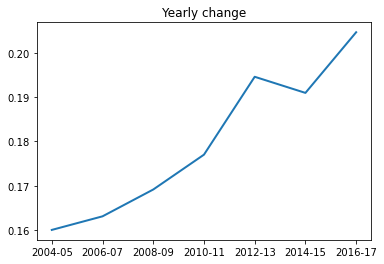

In [8]:
linegraph_df=ont_data_df.loc[ont_data_df["Geography"]=="Ontario",:]
#linegraph_df.head

x_axis = linegraph_df["Time Period"]
case_change = linegraph_df["Average Cases"]

plt.title('Yearly change')
plt.plot(x_axis, case_change, linewidth=2, markersize=14)
plt.xlabel=('Time Period')
plt.ylabel=('Cases')
plt.show

In [9]:
tor_data_df = hospital_data_df.loc[hospital_data_df["Geography"]=="Toronto Public Health",:]
tor_data_df["cases_avg"]=tor_data_df['Overall Cases']/tor_data_df['Overall Population']*100
tor_data_df

<ipython-input-9-c3fc6c8db351>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tor_data_df["cases_avg"]=tor_data_df['Overall Cases']/tor_data_df['Overall Population']*100


,Indicator,Time Period,Geography,Overall Cases,Overall Population,cases_avg
343,Alcohol-Attributable Hospitalization,2004-05,Toronto Public Health,6831,4958480,0.137764
344,Alcohol-Attributable Hospitalization,2006-07,Toronto Public Health,6724,4958480,0.135606
345,Alcohol-Attributable Hospitalization,2008-09,Toronto Public Health,7360,5086705,0.144691
346,Alcohol-Attributable Hospitalization,2010-11,Toronto Public Health,8285,5214930,0.158871
347,Alcohol-Attributable Hospitalization,2012-13,Toronto Public Health,9530,5214930,0.182745
348,Alcohol-Attributable Hospitalization,2014-15,Toronto Public Health,9702,5459460,0.177710
349,Alcohol-Attributable Hospitalization,2016-17,Toronto Public Health,10928,5459460,0.200166


<function matplotlib.pyplot.show(*args, **kw)>

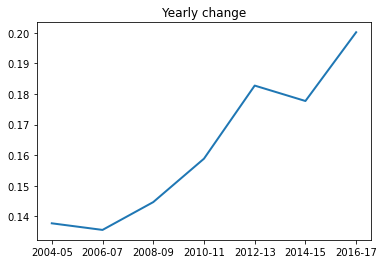

In [10]:
linegraph_df=tor_data_df.loc[tor_data_df["Geography"]=="Toronto Public Health",:]
#linegraph_df.head

x_axis = linegraph_df["Time Period"]
case_change = linegraph_df["cases_avg"]

plt.title('Yearly change')
plt.plot(x_axis, case_change, linewidth=2, markersize=14)
plt.xlabel=('Time Period')
plt.ylabel=('Cases')
plt.show

In [11]:
x_axis = np.arange(len(hospital_data_df))
tick_locations = [value for value in x_axis]



In [12]:
plt.figure(figsize=(200,200))

plt.bar(x_axis, hospital_data_df["Overall Cases"], color='r', alpha=0.9, align="edge")
plt.xticks(tick_locations, hospital_data_df["Geography"], rotation="vertical")

([<matplotlib.axis.XTick at 0x7fcbecd3aee0>,
 [Text(0, 0, 'Ontario'),
  Text(0, 0, 'Ontario'),
  Text(0, 0, 'Ontario'),
  Text(0, 0, 'Ontario'),
  Text(0, 0, 'Ontario'),
  Text(0, 0, 'Ontario'),
  Text(0, 0, 'Ontario'),
  Text(0, 0, 'Erie St. Clair LHIN'),
  Text(0, 0, 'Erie St. Clair LHIN'),
  Text(0, 0, 'Erie St. Clair LHIN'),
  Text(0, 0, 'Erie St. Clair LHIN'),
  Text(0, 0, 'Erie St. Clair LHIN'),
  Text(0, 0, 'Erie St. Clair LHIN'),
  Text(0, 0, 'Erie St. Clair LHIN'),
  Text(0, 0, 'South West LHIN'),
  Text(0, 0, 'South West LHIN'),
  Text(0, 0, 'South West LHIN'),
  Text(0, 0, 'South West LHIN'),
  Text(0, 0, 'South West LHIN'),
  Text(0, 0, 'South West LHIN'),
  Text(0, 0, 'South West LHIN'),
  Text(0, 0, 'Waterloo Wellington LHIN'),
  Text(0, 0, 'Waterloo Wellington LHIN'),
  Text(0, 0, 'Waterloo Wellington LHIN'),
  Text(0, 0, 'Waterloo Wellington LHIN'),
  Text(0, 0, 'Waterloo Wellington LHIN'),
  Text(0, 0, 'Waterloo Wellington LHIN'),
  Text(0, 0, 'Waterloo Wellington LHIN

KeyError: 'Geography'